<a href="https://colab.research.google.com/github/EduardaSantosDiniz/Acidentes_Transito/blob/main/Acidentes_Transito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olá aqui eu irei tentar resolver um problema
# Qual a maior probabilidade de acontecer um acidadente🚗❌?:

Pontos importantes para entender quais paremetros eu vou usar:


*   Clima
*   Dia da Semana
*   Fase do Dia
*   Estado da Pista
---

Não vou usar dados como gênero, estado e tipo de veículo.
# **Porque?**

Porque dependem muito do número total de pessoas, por exemplo, se eu verificar em qual estado acontece mais acidente, provavelmente São Paulo irá ser o primeiro, porém provavelmente pelo números de habitantes que exitesm nessa capital em comparação com as outras, o mesmo com o gênero.


---



**Trocando o nome das colunas e mostrando o número total de linhas.**

In [38]:
import pandas as pd

df = pd.read_csv('DadosTratados.csv', delimiter=';', on_bad_lines='skip')
df.columns = ['Id', 'Estado', 'Ano', 'Dia', 'Fase', 'Tipo', 'Clima', 'Pista', 'num de feridos', 'num de obitos']

print(df.head())
print(f"Número de linhas: {df.shape[0]}")

        Id Estado   Ano            Dia       Fase     Tipo  Clima Pista  \
0  3224316     AC  2018  Segunda-feira      Tarde  Colisão  Claro  Seca   
1  3346658     AC  2018  Segunda-feira      Tarde  Colisão  Claro  Seca   
2  2631190     AC  2018  Segunda-feira      Manhã  Colisão  Claro  Seca   
3  1557469     AC  2018  Segunda-feira      Tarde  Colisão  Claro  Seca   
4  1729703     AC  2018  Segunda-feira  Madrugada  Colisão  Claro  Seca   

   num de feridos  num de obitos  
0             2.0            0.0  
1             2.0            0.0  
2             3.0            0.0  
3             2.0            0.0  
4             2.0            0.0  
Número de linhas: 4209


---
**Fazendo um gráfico para visualizar os dias que mais ocorreram acidentes.**




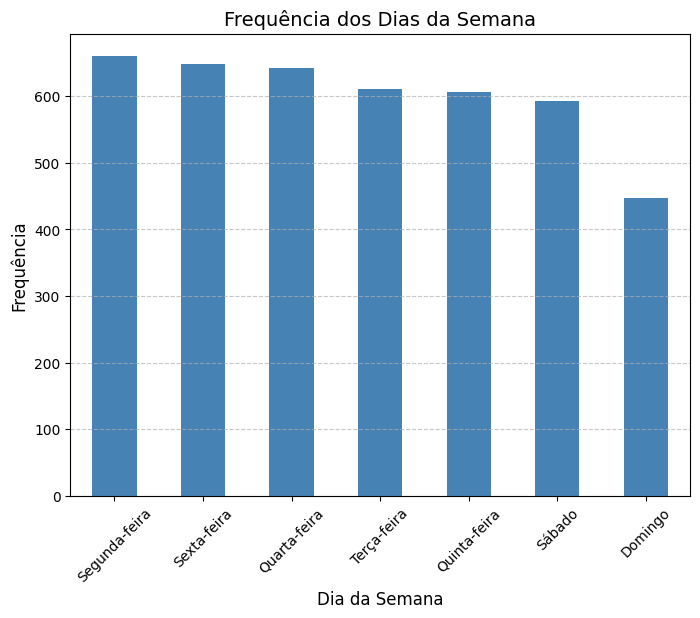

In [39]:
contagem_dias = df['Dia'].value_counts()

contagem_dias.plot(kind='bar', color='steelblue', figsize=(8, 6))

plt.title('Frequência dos Dias da Semana', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



---


**Fazendo um gráfico para visualizar qual o clima que mais ocorreram acidentes.**

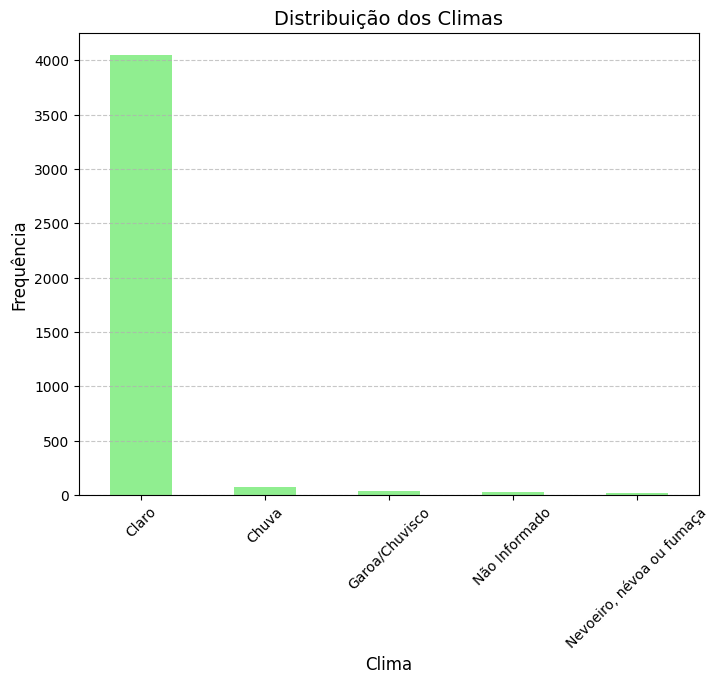

In [40]:
contagem_clima = df['Clima'].value_counts()
contagem_clima.plot(kind='bar', color='lightgreen', figsize=(8, 6))
plt.title('Distribuição dos Climas', fontsize=14)
plt.xlabel('Clima', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




---


**Fazendo um gráfico para visualizar qual a condição da pista que mais ocorreram acidentes.**

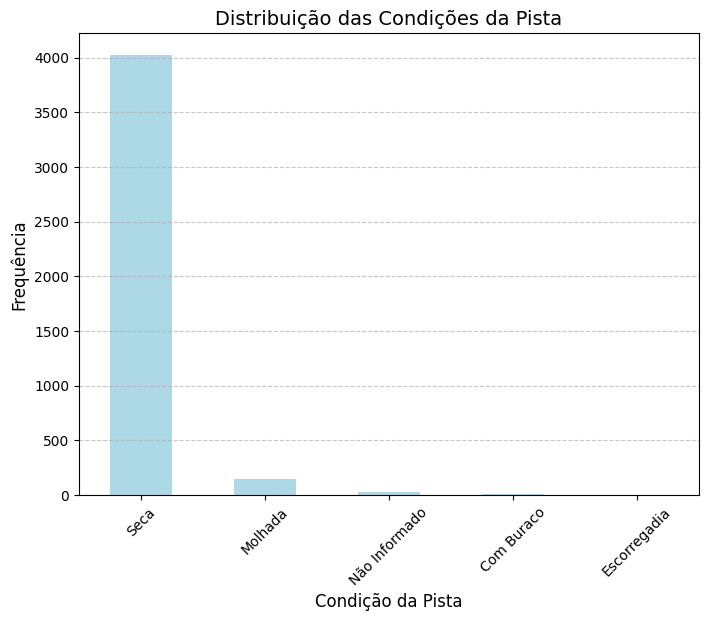

In [41]:
# Gráfico para a Pista
contagem_pista = df['Pista'].value_counts()
contagem_pista.plot(kind='bar', color='lightblue', figsize=(8, 6))
plt.title('Distribuição das Condições da Pista', fontsize=14)
plt.xlabel('Condição da Pista', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



---


**Fazendo um gráfico para visualizar qual a fase do dia que mais ocorreram acidentes.**

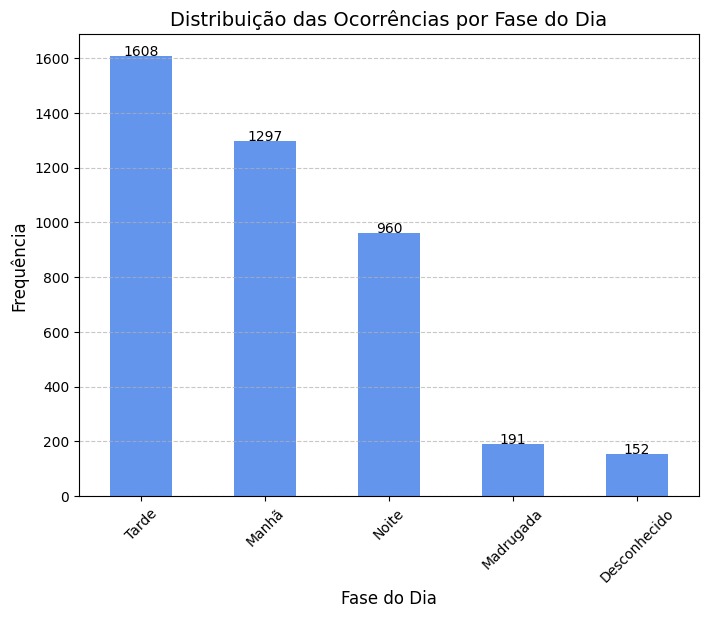

In [42]:
contagem_fase = df['Fase'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
barras = contagem_fase.plot(kind='bar', color='cornflowerblue', ax=ax)

for barra in barras.patches:
    valor = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, valor + 1,
            str(int(valor)), ha='center', fontsize=10, color='black')

plt.title('Distribuição das Ocorrências por Fase do Dia', fontsize=14)
plt.xlabel('Fase do Dia', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



---


**Juntando todos as combinações que ocorreram mais acidentes e visualizando.**

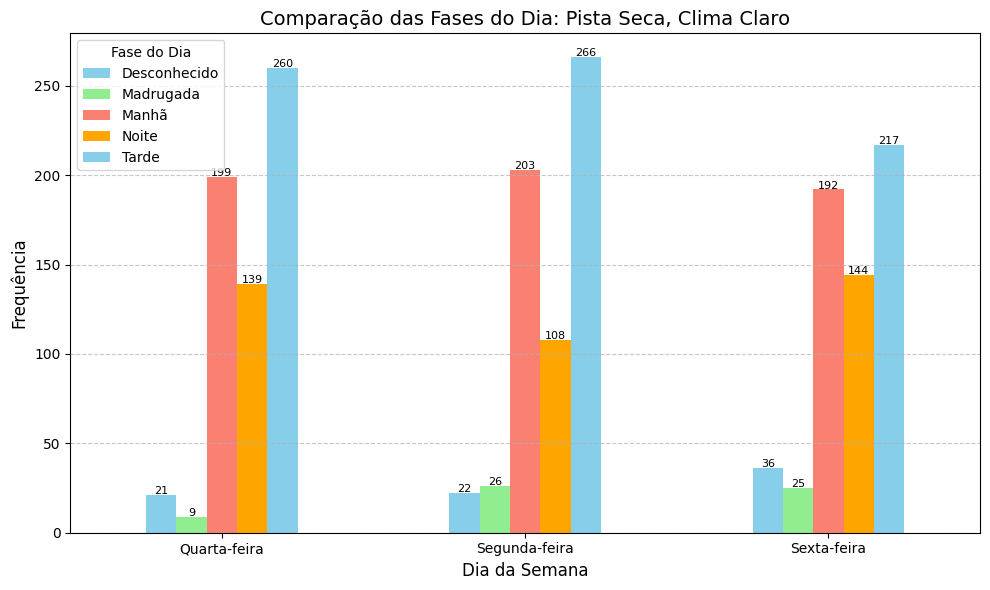

In [43]:
filtro = (df['Pista'] == 'Seca') & (df['Clima'] == 'Claro') & (df['Dia'].isin(['Segunda-feira', 'Quarta-feira', 'Sexta-feira']))
df_filtrado = df[filtro]

contagem_fases = df_filtrado.groupby(['Dia', 'Fase']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
contagem_fases.plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen', 'salmon', 'orange'])

for barra in ax.patches:
    valor = barra.get_height()
    if valor > 0:
        ax.text(barra.get_x() + barra.get_width() / 2, valor + 0.5,
                str(int(valor)), ha='center', fontsize=8, color='black')

plt.title('Comparação das Fases do Dia: Pista Seca, Clima Claro', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Fase do Dia', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



---


Podemos verificar que no ano de 2018 os acidentes ocorreram no período da tarde, com a pista seca, o clima claro e provavelmente em uma segunda-feira ou quarta-feira.


---


Por incrivel que pareça **os dados foram contra a previsão**, muitos pensam que seria em uma madrugada pela falta de luz, ou em uma sexta pelo aumento de condutores dirigindo com efeito do álcool, porém o que **os dados nos mostram são que os condutores acabam se envolvendo em sinistros pelo simples fato de estarem relaxados**, quando um condutor se encontra em um clima chuvoso em uma madrugada, ele costuma redobrar sua atenção, evitando um possível acidente.

# Percebeu o quanto é importante usar os dados para tomar decisões?
Se gostou desse pequeno notebook que fiz, e gostaria de tirar uma dúvida ou algum conselho/feedback.
Me mande mensagem em uma das minhas redes:
# 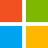 eduardafaculdade0306@gmail.com

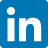 https://www.linkedin.com/in/eduarda-diniz-24a275272/
